In [1]:
import numpy as np
import pandas as pd
import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Librairies imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Librairies imported.


In [2]:
data_barcelona = pd.read_excel('/Users/pierrecharenton/Desktop/District Barcelona.xlsx')
data_barcelona

,Number,Borough,Zip_Code,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood
0,1,Ciutat Vella,"8001,8002,8003,8005,8007,8010,8018,8038,8039",41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,2,Eixample,"8001,8002,8005,8007,8008,8009,8010,8011,8013,8...",41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
2,3,Sants-Montjuïc,"8001,8004,8009,8014,8028,8029,8038,8039,0840",41.351040,2.145683,177.636,8.321,"La Bordeta, la Font de la Guatlla, Hostafrancs..."
3,4,Les Corts,"8014,8017,8028,8029,8034",41.383490,2.116797,82.588,13.584,"les Corts, la Maternitat i Sant Ramon, Pedralbes"
4,5,Sarrià-Sant Gervasi,"8006,8012,8017,8021,8022,8023,8027,8028,8034,8...",41.414383,2.105599,140.461,6.992,"El Putget i Farró, Sarrià, Sant Gervasi - la B..."
5,6,Gràcia,"8006,8008,8012,8016,8023,8024,8025,8032,8035,8037",41.409775,2.153920,120.087,28.660,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
6,7,Horta-Guinardó,"8023,8024,8025,8031,8032,8033,8035,8041,8042",41.435302,2.147816,169.920,14.217,"El Baix Guinardó, El Guinardó, Can Baró, El Ca..."
7,8,Nou Barris,"8016,8027,8031,8033,8035,8042",41.445699,2.179414,164.981,20.520,"Can Peguera, Canyelles, Ciutat Meridiana, La G..."
8,9,Sant Andreu,"8020,8024,8026,8027,8038,8041",41.433675,2.185790,142.598,21.737,"Baró de Viver, Bon Pastor, El Congrés i els In..."
9,10,Sant Martí,"8003,8005,8013,8018,8019,8020,8025,8026,8027,8...",41.405293,2.199076,221.029,20.466,"El Besòs i el Maresme, el Clot, El Camp de l'A..."


In [3]:
data_barcelona.shape

(10, 8)

In [4]:
data_barcelona.dtypes

Number                       int64
Borough                     object
Zip_Code                    object
Latitude                   float64
Longitude                  float64
Population                 float64
Density_inhabitants/km2    float64
Neighborhood                object
dtype: object

## Data Cleaning

In [5]:
# remove the columns we don't need for this project : Number and Density inhabitants/km2

data_barcelona.drop(['Number', 'Zip_Code'], axis=1, inplace=True)
data_barcelona

,Borough,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood
0,Ciutat Vella,41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,Eixample,41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
2,Sants-Montjuïc,41.351040,2.145683,177.636,8.321,"La Bordeta, la Font de la Guatlla, Hostafrancs..."
3,Les Corts,41.383490,2.116797,82.588,13.584,"les Corts, la Maternitat i Sant Ramon, Pedralbes"
4,Sarrià-Sant Gervasi,41.414383,2.105599,140.461,6.992,"El Putget i Farró, Sarrià, Sant Gervasi - la B..."
5,Gràcia,41.409775,2.153920,120.087,28.660,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
6,Horta-Guinardó,41.435302,2.147816,169.920,14.217,"El Baix Guinardó, El Guinardó, Can Baró, El Ca..."
7,Nou Barris,41.445699,2.179414,164.981,20.520,"Can Peguera, Canyelles, Ciutat Meridiana, La G..."
8,Sant Andreu,41.433675,2.185790,142.598,21.737,"Baró de Viver, Bon Pastor, El Congrés i els In..."
9,Sant Martí,41.405293,2.199076,221.029,20.466,"El Besòs i el Maresme, el Clot, El Camp de l'A..."


In [6]:
data_barcelona.shape

(10, 6)

## Geolocalize Barcelona City

In [7]:
# Define the geographical coordinate of Barcelona

address = 'Barcelona, SP'

geolocator = Nominatim(user_agent="Barcelona")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Barcelona are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Barcelona are 41.3828939, 2.1774322.


In [8]:
# create map of Barcelona using latitude and longitude values

map_barcelona = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, borough, neighborhood in zip(data_barcelona['Latitude'], data_barcelona['Longitude'], data_barcelona['Borough'], data_barcelona['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_barcelona)

map_barcelona

## Foursquare Analyze

In [9]:
CLIENT_ID = 'KBRRVCAZH3HX45R4TZ0QD13VS1VLZ31DVT5CSPYDSDGSOG5B'
CLIENT_SECRET = 'UP3RESI54A4ZAVOP0QXC5RAWMV1UQTH1AC010DCUKAZQ1ABF'
VERSION = '20180605'
LIMIT = 100

print('Your credentials:')
print('CLIENT_ID' + CLIENT_ID)
print('CLIENT_SECRET'+ CLIENT_SECRET)

Your credentials:
CLIENT_IDKBRRVCAZH3HX45R4TZ0QD13VS1VLZ31DVT5CSPYDSDGSOG5B
CLIENT_SECRETUP3RESI54A4ZAVOP0QXC5RAWMV1UQTH1AC010DCUKAZQ1ABF


In [10]:
LIMIT = 100
RADIUS = 500

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, RADIUS, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=KBRRVCAZH3HX45R4TZ0QD13VS1VLZ31DVT5CSPYDSDGSOG5B&client_secret=UP3RESI54A4ZAVOP0QXC5RAWMV1UQTH1AC010DCUKAZQ1ABF&v=20180605&ll=41.3828939,2.1774322&radius=500&limit=100'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '61152bec0bcf2c624bee520d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'El Barri Gòtic',
  'headerFullLocation': 'El Barri Gòtic, Barcelona',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 187,
  'suggestedBounds': {'ne': {'lat': 41.3873939045, 'lng': 2.183418541112243},
   'sw': {'lat': 41.3783938955, 'lng': 2.171445858887757}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c45dcab429a0f479cb94a1e',
       'name': 'Barrio Gótico',
       'location': {'lat': 41.38366049614543,
        'lng': 2.1772899008766218,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.38366049614543,
          'lng': 2.17728990

In [12]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list)== 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
# clean the json and structure it into a pandas dataframe

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[1] for col in nearby_venues.columns]

nearby_venues.head(100)

<ipython-input-13-1e97503b3552>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,location,location
0,Barrio Gótico,Neighborhood,41.383660,2.177290
1,Gelaaati! di Marco,Ice Cream Shop,41.383186,2.177369
2,La Alcoba Azul,Spanish Restaurant,41.382833,2.175506
3,Plaça de Sant Felip Neri,Plaza,41.383378,2.175152
4,Plaça del Rei,Plaza,41.384080,2.177496
...,...,...,...,...
95,Museu Picasso,Art Museum,41.384988,2.181086
96,Cuines de Santa Caterina,Mediterranean Restaurant,41.386186,2.178156
97,Viana,Mediterranean Restaurant,41.379846,2.176094
98,Made in Sicily,Italian Restaurant,41.379876,2.176586


In [14]:
# how many venues were returned by Foursquare 

print('{} venues returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues returned by Foursquare.


In [15]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
barcelona_venues = getNearbyVenues(names=data_barcelona['Neighborhood'],
                                   latitudes=data_barcelona['Latitude'],
                                   longitudes=data_barcelona['Longitude']
                                  )

La Barceloneta, El Gòtic, El Raval, Sant Pere, Santa Caterina i la Ribera
L'Antiga Esquerra de l'Eixample, La Nova Esquerra de l'Eixample, Dreta de l'Eixample, Fort Pienc, Sagrada Família, Sant Antoni
La Bordeta, la Font de la Guatlla, Hostafrancs, la Marina de Port, la Marina del Prat Vermell, El Poble-sec, Sants, Sants-Badal, Montjuïc*, Zona Franca - Port*
les Corts, la Maternitat i Sant Ramon, Pedralbes
El Putget i Farró, Sarrià, Sant Gervasi - la Bonanova, Sant Gervasi - Galvany, les Tres Torres, Vallvidrera, Tibidabo i les Planes
Vila de Gràcia, el Camp d'en Grassot i Gràcia Nova, la Salut, el Coll, Vallcarca i els Penitents.
El Baix Guinardó, El Guinardó, Can Baró, El Carmel, la Font d'en Fargues, Horta, la Clota, Montbau, Sant Genís dels Agudells, la Teixonera, La Vall d'Hebron.
Can Peguera, Canyelles, Ciutat Meridiana, La Guineueta, Porta, La Prosperitat, les Roquetes, Torre Baró, la Trinitat Nova, El Turó de la Peira, Vallbona, Verdum, Vilapicina i la Torre Llobeta
Baró de Viv

In [17]:
# Size of the resulting dataframe

print(barcelona_venues.shape)
barcelona_venues.head()

(461, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.380923,2.167697,Carlota Akaneya,41.382349,2.168812,Japanese Restaurant
1,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.380923,2.167697,Caravelle,41.382337,2.168818,Café
2,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.380923,2.167697,NØMAD Every Day,41.382055,2.166349,Coffee Shop
3,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.380923,2.167697,A Tu Bola,41.380096,2.169054,Tapas Restaurant
4,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.380923,2.167697,Grey Street,41.380848,2.166609,Gift Shop


In [18]:
# How many venues were returned for each neighborhood

barcelona_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Baró de Viver, Bon Pastor, El Congrés i els Indians, Navas, Sant Andreu de Palomar, La Sagrera i Trinitat Vella",72,72,72,72,72,72
"Can Peguera, Canyelles, Ciutat Meridiana, La Guineueta, Porta, La Prosperitat, les Roquetes, Torre Baró, la Trinitat Nova, El Turó de la Peira, Vallbona, Verdum, Vilapicina i la Torre Llobeta",16,16,16,16,16,16
"El Baix Guinardó, El Guinardó, Can Baró, El Carmel, la Font d'en Fargues, Horta, la Clota, Montbau, Sant Genís dels Agudells, la Teixonera, La Vall d'Hebron.",17,17,17,17,17,17
"El Besòs i el Maresme, el Clot, El Camp de l'Arpa del Clot, Diagonal Mar i el Front Marítim del Poblenou, el Parc i la Llacuna del Poblenou, Poblenou, Provençals del Poblenou, Sant Martí de Provençals, La Verneda i la Pau, la Vila Olímpica del Poblenou",43,43,43,43,43,43
"El Putget i Farró, Sarrià, Sant Gervasi - la Bonanova, Sant Gervasi - Galvany, les Tres Torres, Vallvidrera, Tibidabo i les Planes",8,8,8,8,8,8
"L'Antiga Esquerra de l'Eixample, La Nova Esquerra de l'Eixample, Dreta de l'Eixample, Fort Pienc, Sagrada Família, Sant Antoni",100,100,100,100,100,100
"La Barceloneta, El Gòtic, El Raval, Sant Pere, Santa Caterina i la Ribera",100,100,100,100,100,100
"La Bordeta, la Font de la Guatlla, Hostafrancs, la Marina de Port, la Marina del Prat Vermell, El Poble-sec, Sants, Sants-Badal, Montjuïc*, Zona Franca - Port*",10,10,10,10,10,10
"Vila de Gràcia, el Camp d'en Grassot i Gràcia Nova, la Salut, el Coll, Vallcarca i els Penitents.",71,71,71,71,71,71


In [19]:
# How many unique categories can be curated from all the returned values

print('There are {} unique categories.'.format(len(barcelona_venues['Venue Category'].unique())))

There are 138 unique categories.


In [20]:
# one hot encoding
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to datraframe
barcelona_onehot['Neighborhood'] = barcelona_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])

barcelona_onehot.head()

,Accessories Store,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."


In [21]:
# Examine the new dataframe size

barcelona_onehot.shape

(461, 139)

In [22]:
# Group rows by neighborhood and by taking the mean of the frequency of occurence of each category

barcelona_grouped = barcelona_onehot.groupby('Neighborhood').mean().reset_index()
barcelona_grouped

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,...,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,"Baró de Viver, Bon Pastor, El Congrés i els In...",0.00,0.013889,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.0,...,0.041667,0.00,0.000000,0.00,0.013889,0.013889,0.000000,0.000000,0.000000,0.00
1,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,"El Besòs i el Maresme, el Clot, El Camp de l'A...",0.00,0.000000,0.023256,0.023256,0.000000,0.023256,0.046512,0.000000,0.0,...,0.023256,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.046512,0.000000,0.00
4,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",0.01,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.0,...,0.050000,0.00,0.000000,0.01,0.000000,0.000000,0.000000,0.010000,0.020000,0.01
6,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",0.00,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.0,...,0.060000,0.01,0.000000,0.00,0.010000,0.000000,0.000000,0.020000,0.010000,0.00
7,"La Bordeta, la Font de la Guatlla, Hostafrancs...",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ...",0.00,0.000000,0.000000,0.000000,0.014085,0.014085,0.014085,0.000000,0.0,...,0.056338,0.00,0.014085,0.00,0.000000,0.000000,0.000000,0.000000,0.014085,0.00
9,"les Corts, la Maternitat i Sant Ramon, Pedralbes",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.0,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,0.00


In [24]:
# print each neighborhood along with the top 5 most common values

num_top_venues = 10

for hood in barcelona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = barcelona_grouped[barcelona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baró de Viver, Bon Pastor, El Congrés i els Indians, Navas, Sant Andreu de Palomar, La Sagrera i Trinitat Vella----
                      venue  freq
0                       Bar  0.06
1                      Café  0.06
2        Spanish Restaurant  0.06
3               Supermarket  0.04
4            Sandwich Place  0.04
5        Falafel Restaurant  0.04
6  Mediterranean Restaurant  0.04
7          Tapas Restaurant  0.04
8            Clothing Store  0.03
9                      Park  0.03


----Can Peguera, Canyelles, Ciutat Meridiana, La Guineueta, Porta, La Prosperitat, les Roquetes, Torre Baró, la Trinitat Nova, El Turó de la Peira, Vallbona, Verdum, Vilapicina i la Torre Llobeta----
                venue  freq
0       Grocery Store  0.19
1  Spanish Restaurant  0.19
2         Music Venue  0.06
3            Building  0.06
4           Gift Shop  0.06
5         Sports Club  0.06
6                Park  0.06
7         Supermarket  0.06
8                 Bar  0.06
9         Coffee Shop  0

In [25]:
# function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
# create a new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = barcelona_grouped['Neighborhood']

for ind in np.arange(barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(
)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Baró de Viver, Bon Pastor, El Congrés i els In...",Bar,Spanish Restaurant,Café,Sandwich Place,Tapas Restaurant,Mediterranean Restaurant,Falafel Restaurant,Supermarket,Coffee Shop,Clothing Store
1,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",Spanish Restaurant,Grocery Store,Coffee Shop,Sports Club,Park,Restaurant,Music Venue,Building,Gift Shop,Bar
2,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",Plaza,Hotel,Soccer Field,Spanish Restaurant,Gym,Garden,Soccer Stadium,Mediterranean Restaurant,Grocery Store,Stadium
3,"El Besòs i el Maresme, el Clot, El Camp de l'A...",Mediterranean Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Hotel,Japanese Restaurant,Asian Restaurant,Cocktail Bar,Bakery,Indian Restaurant,Dessert Shop
4,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",Convenience Store,Soccer Field,Light Rail Station,National Park,Farmers Market,Plaza,Building,Ice Cream Shop,Athletics & Sports,Gay Bar


## Clustering

In [28]:
# set a number of clusters
kclusters = 5
barcelona_grouped_clustering = barcelona_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)

# check cluster labels
kmeans.labels_[0:10]

array([1, 0, 3, 1, 2, 1, 1, 4, 1, 1], dtype=int32)

In [29]:
# create a new dataframe with the top 10 venues 

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

barcelona_merged = data_barcelona

barcelona_merged = barcelona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

barcelona_merged.head()

,Borough,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",1,Spanish Restaurant,Cocktail Bar,Mediterranean Restaurant,Bar,Tapas Restaurant,Café,Coffee Shop,Restaurant,Donut Shop,Bookstore
1,Eixample,41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",1,Hotel,Boutique,Tapas Restaurant,Bakery,Cosmetics Shop,Spanish Restaurant,Clothing Store,Hostel,Mediterranean Restaurant,Bookstore
2,Sants-Montjuïc,41.351040,2.145683,177.636,8.321,"La Bordeta, la Font de la Guatlla, Hostafrancs...",4,Spanish Restaurant,Restaurant,Supermarket,Auto Garage,Food,Bus Stop,Mediterranean Restaurant,Gastropub,Empanada Restaurant,Donut Shop
3,Les Corts,41.383490,2.116797,82.588,13.584,"les Corts, la Maternitat i Sant Ramon, Pedralbes",1,Tram Station,Nightclub,Metro Station,Bar,Bowling Alley,Football Stadium,Science Museum,Museum,Garden,Print Shop
4,Sarrià-Sant Gervasi,41.414383,2.105599,140.461,6.992,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",2,Convenience Store,Soccer Field,Light Rail Station,National Park,Farmers Market,Plaza,Building,Ice Cream Shop,Athletics & Sports,Gay Bar


In [30]:
# create a map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['Latitude'], barcelona_merged['Longitude'], barcelona_merged['Neighborhood'], barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
        
map_clusters

In [31]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 0, barcelona_merged.columns[[1] + list(range(5, barcelona_merged.shape[1]))]]

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,41.445699,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",0,Spanish Restaurant,Grocery Store,Coffee Shop,Sports Club,Park,Restaurant,Music Venue,Building,Gift Shop,Bar


In [32]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 1, barcelona_merged.columns[[1] + list(range(5, barcelona_merged.shape[1]))]]

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,41.380923,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",1,Spanish Restaurant,Cocktail Bar,Mediterranean Restaurant,Bar,Tapas Restaurant,Café,Coffee Shop,Restaurant,Donut Shop,Bookstore
1,41.391843,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",1,Hotel,Boutique,Tapas Restaurant,Bakery,Cosmetics Shop,Spanish Restaurant,Clothing Store,Hostel,Mediterranean Restaurant,Bookstore
3,41.383490,"les Corts, la Maternitat i Sant Ramon, Pedralbes",1,Tram Station,Nightclub,Metro Station,Bar,Bowling Alley,Football Stadium,Science Museum,Museum,Garden,Print Shop
5,41.409775,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ...",1,Bar,Sandwich Place,Tapas Restaurant,Restaurant,Historic Site,Plaza,Spanish Restaurant,Supermarket,Café,Grocery Store
8,41.433675,"Baró de Viver, Bon Pastor, El Congrés i els In...",1,Bar,Spanish Restaurant,Café,Sandwich Place,Tapas Restaurant,Mediterranean Restaurant,Falafel Restaurant,Supermarket,Coffee Shop,Clothing Store
9,41.405293,"El Besòs i el Maresme, el Clot, El Camp de l'A...",1,Mediterranean Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Hotel,Japanese Restaurant,Asian Restaurant,Cocktail Bar,Bakery,Indian Restaurant,Dessert Shop


In [33]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 2, barcelona_merged.columns[[1] + list(range(5, barcelona_merged.shape[1]))]]

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,41.414383,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",2,Convenience Store,Soccer Field,Light Rail Station,National Park,Farmers Market,Plaza,Building,Ice Cream Shop,Athletics & Sports,Gay Bar


In [34]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 3, barcelona_merged.columns[[1] + list(range(5, barcelona_merged.shape[1]))]]

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,41.435302,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",3,Plaza,Hotel,Soccer Field,Spanish Restaurant,Gym,Garden,Soccer Stadium,Mediterranean Restaurant,Grocery Store,Stadium


In [35]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 4, barcelona_merged.columns[[1] + list(range(5, barcelona_merged.shape[1]))]]

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,41.35104,"La Bordeta, la Font de la Guatlla, Hostafrancs...",4,Spanish Restaurant,Restaurant,Supermarket,Auto Garage,Food,Bus Stop,Mediterranean Restaurant,Gastropub,Empanada Restaurant,Donut Shop


## Data analyze of the best cluster

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data_cluster = data_barcelona.drop(index = [2, 4, 6, 7])
data_cluster

,Borough,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood
0,Ciutat Vella,41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,Eixample,41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
3,Les Corts,41.383490,2.116797,82.588,13.584,"les Corts, la Maternitat i Sant Ramon, Pedralbes"
5,Gràcia,41.409775,2.153920,120.087,28.660,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
8,Sant Andreu,41.433675,2.185790,142.598,21.737,"Baró de Viver, Bon Pastor, El Congrés i els In..."
9,Sant Martí,41.405293,2.199076,221.029,20.466,"El Besòs i el Maresme, el Clot, El Camp de l'A..."


### Geolocalize Barcelona centric down town : Catalonia Square

In [38]:
# Define the geographical coordinate of Catalonia Square

address = 'Catalonia Square, SP'

geolocator = Nominatim(user_agent="Barcelona")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Catalonia Square are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Catalonia Square are 41.3868794, 2.170067825120773.


In [40]:
map_cat_square = folium.Map(location=[41.3868794, 2.170067825120773], zoom_start=13)
folium.Marker([41.3868794, 2.170067825120773], popup="Catalonia Square").add_to(map_cat_square)
folium.CircleMarker([41.380923, 2.167697], radius=35, fill=True, color='green', popup="Ciutat Vella").add_to(map_cat_square)
folium.CircleMarker([41.391843, 2.164197], radius=35, fill=True, color='grey', popup="Eixample").add_to(map_cat_square)
folium.CircleMarker([41.383490, 2.116797], radius=35, fill=True, color='red', popup="Les Corts").add_to(map_cat_square)
folium.CircleMarker([41.409775, 2.153920], radius=35, fill=True, color='yellow', popup="Gràcia").add_to(map_cat_square)
folium.CircleMarker([41.433675, 2.185790], radius=35, fill=True, color='blue', popup="Sant Andreu").add_to(map_cat_square)
folium.CircleMarker([41.405293, 2.199076], radius=35, fill=True, color='orange', popup="Sant Martí").add_to(map_cat_square)

map_cat_square

### Exclude Les Corts Borough : low population, low population density, distant borough

In [41]:
data_cluster.sort_values(['Population'], ascending = None)

,Borough,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood
1,Eixample,41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
9,Sant Martí,41.405293,2.199076,221.029,20.466,"El Besòs i el Maresme, el Clot, El Camp de l'A..."
8,Sant Andreu,41.433675,2.185790,142.598,21.737,"Baró de Viver, Bon Pastor, El Congrés i els In..."
5,Gràcia,41.409775,2.153920,120.087,28.660,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
0,Ciutat Vella,41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
3,Les Corts,41.383490,2.116797,82.588,13.584,"les Corts, la Maternitat i Sant Ramon, Pedralbes"


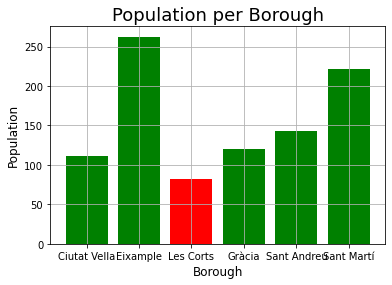

In [43]:
colors = ['green', 'green', 'red', 'green', 'green', 'green']
plt.bar(x=data_cluster['Borough'], height=data_cluster['Population'], color=colors) 
plt.title('Population per Borough', fontsize=18)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.grid(True)

In [44]:
data_cluster.sort_values(['Density_inhabitants/km2'], ascending = None)

,Borough,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood
1,Eixample,41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
5,Gràcia,41.409775,2.153920,120.087,28.660,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
0,Ciutat Vella,41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
8,Sant Andreu,41.433675,2.185790,142.598,21.737,"Baró de Viver, Bon Pastor, El Congrés i els In..."
9,Sant Martí,41.405293,2.199076,221.029,20.466,"El Besòs i el Maresme, el Clot, El Camp de l'A..."
3,Les Corts,41.383490,2.116797,82.588,13.584,"les Corts, la Maternitat i Sant Ramon, Pedralbes"


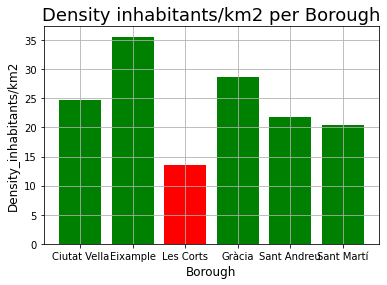

In [45]:
colors = ['green', 'green', 'red', 'green', 'green', 'green']
plt.bar(x=data_cluster['Borough'], height=data_cluster['Density_inhabitants/km2'], color=colors) 
plt.title('Density inhabitants/km2 per Borough', fontsize=18)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Density_inhabitants/km2', fontsize=12)
plt.grid(True)

In [46]:
map_cat_square = folium.Map(location=[41.3868794, 2.170067825120773], zoom_start=13)
folium.Marker([41.3868794, 2.170067825120773], popup="Catalonia Square").add_to(map_cat_square)
folium.CircleMarker([41.380923, 2.167697], radius=35, fill=True, color='green', popup="Ciutat Vella").add_to(map_cat_square)
folium.CircleMarker([41.391843, 2.164197], radius=35, fill=True, color='grey', popup="Eixample").add_to(map_cat_square)
folium.CircleMarker([41.383490, 2.116797], radius=35, fill=True, color='red', popup="Les Corts").add_to(map_cat_square)
folium.CircleMarker([41.409775, 2.153920], radius=35, fill=True, color='yellow', popup="Gràcia").add_to(map_cat_square)
folium.CircleMarker([41.433675, 2.185790], radius=35, fill=True, color='blue', popup="Sant Andreu").add_to(map_cat_square)
folium.CircleMarker([41.405293, 2.199076], radius=35, fill=True, color='orange', popup="Sant Martí").add_to(map_cat_square)

map_cat_square

In [47]:
data_cluster1 = data_cluster.drop(index = [3])
data_cluster1

,Borough,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood
0,Ciutat Vella,41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,Eixample,41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
5,Gràcia,41.409775,2.153920,120.087,28.660,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
8,Sant Andreu,41.433675,2.185790,142.598,21.737,"Baró de Viver, Bon Pastor, El Congrés i els In..."
9,Sant Martí,41.405293,2.199076,221.029,20.466,"El Besòs i el Maresme, el Clot, El Camp de l'A..."


### Exclude : Sant Andreu Borough (blue circle) , Sant Martí (orange circle) and  Gràcia (Yellow circle) : too far away from the down town


In [48]:
map_cat_square1 = folium.Map(location=[41.3868794, 2.170067825120773], zoom_start=13)
folium.Marker([41.3868794, 2.170067825120773], popup="Catalonia Square").add_to(map_cat_square1)
folium.CircleMarker([41.380923, 2.167697], radius=35, fill=True, color='green', popup="Ciutat Vella").add_to(map_cat_square1)
folium.CircleMarker([41.391843, 2.164197], radius=35, fill=True, color='grey', popup="Eixample").add_to(map_cat_square1)
folium.CircleMarker([41.409775, 2.153920], radius=35, fill=True, color='yellow', popup="Gràcia").add_to(map_cat_square1)
folium.CircleMarker([41.433675, 2.185790], radius=35, fill=True, color='blue', popup="Sant Andreu").add_to(map_cat_square1)
folium.CircleMarker([41.405293, 2.199076], radius=35, fill=True, color='orange', popup="Sant Martí").add_to(map_cat_square1)

map_cat_square1

### The battle for the first  place : Ciutat Vella or Eixample ?

In [50]:
data_cluster2 = data_cluster1.drop(index = [5,8,9])
data_cluster2

,Borough,Latitude,Longitude,Population,Density_inhabitants/km2,Neighborhood
0,Ciutat Vella,41.380923,2.167697,111.290,24.786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,Eixample,41.391843,2.164197,262.485,35.586,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."


In [56]:
map_cat_square2 = folium.Map(location=[41.3868794, 2.170067825120773], zoom_start=13)
folium.Marker([41.3868794, 2.170067825120773], popup="Catalonia Square").add_to(map_cat_square2)
folium.CircleMarker([41.380923, 2.167697], radius=35, fill=True, color='green', popup="Ciutat Vella").add_to(map_cat_square2)
folium.CircleMarker([41.391843, 2.164197], radius=35, fill=True, color='grey', popup="Eixample").add_to(map_cat_square2)

map_cat_square2

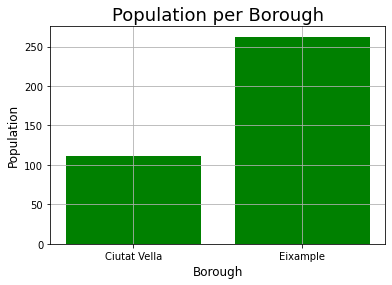

In [57]:
# Population analysis

colors = ['green', 'green']
plt.bar(x=data_cluster2['Borough'], height=data_cluster2['Population'], color=colors) 
plt.title('Population per Borough', fontsize=18)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.grid(True)

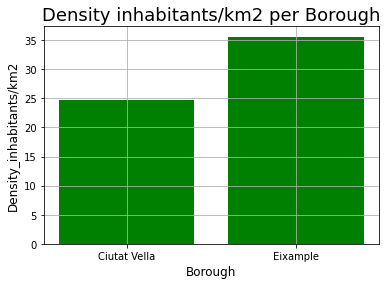

In [58]:
# density of population analysis

colors = ['green', 'green']
plt.bar(x=data_cluster2['Borough'], height=data_cluster2['Density_inhabitants/km2'], color=colors) 
plt.title('Density inhabitants/km2 per Borough', fontsize=18)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Density_inhabitants/km2', fontsize=12)
plt.grid(True)

## Eixample Borough is the best place for both local population target and tourists target

In [59]:
map_cat_square3 = folium.Map(location=[41.3868794, 2.170067825120773], zoom_start=13)
folium.Marker([41.3868794, 2.170067825120773], popup="Catalonia Square").add_to(map_cat_square3)
folium.CircleMarker([41.391843, 2.164197], radius=35, fill=True, color='grey', popup="Eixample").add_to(map_cat_square3)

map_cat_square3